### Importing the Libraries

In [1]:
import numpy as np  # For using n-d array mathematical operations
import pandas as pd # For open csv files and create dataframe
import matplotlib.pyplot as plt # For plotting graphs

### Reading CSV Files and Checking the content in it

In [2]:
# Opening csv files
dataset = pd.read_csv('startup_funding.csv', skipinitialspace = True, encoding = 'utf-8')
df = dataset.copy() # Copying the dataset dataframe in df in case anything goes wrong, we can start again
df.head(10) # Showing first 10 rows in df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN


### Solution for given problem
To find out optimal location among Bangalore, Mumbai and NCR for the startup. We need to find total number of
fundings in each cities and compare accordingly.

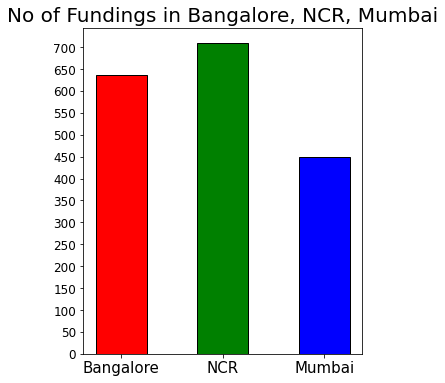

In [3]:
df.CityLocation.fillna('', inplace = True) # 
df.CityLocation.replace('Delhi', 'New Delhi', inplace = True)
df.CityLocation.replace('bangalore', 'Bangalore', inplace = True)
cityLocations = df.CityLocation # Fetching cities from the CityLocation column
locationWithFundCount = {} # Creating a dictionary which contain count of no of fundings with each location

# Fetching the count of fundings for each location
for locations in cityLocations:
    location = locations.split('/')
    for locate in location:
        if locate != '':
            if locate[-1] == ' ':
                locate = locate[:-1]
            if locate[0] == ' ':
                locate = locate[1:]
            locationWithFundCount[locate] = locationWithFundCount.get(locate,0)+1

# Finding the count of funding NCR
locationWithFundCount['NCR'] = (locationWithFundCount['New Delhi'] + 
                                 locationWithFundCount['Gurgaon'] + locationWithFundCount['Noida'])
BangaloreCount = locationWithFundCount['Bangalore']
NCRCount = locationWithFundCount['NCR']
MumbaiCount = locationWithFundCount['Mumbai']
count = [BangaloreCount,NCRCount,MumbaiCount]

# Plotting the bar graph
plt.figure(figsize = (5,6))
plt.bar(x = ['Bangalore', 'NCR', 'Mumbai'], height = count, width = 0.5, 
        color = ['red', 'green', 'blue'], edgecolor = 'black')
plt.xticks(fontsize = 15)
plt.yticks(np.arange(0,750,50), fontsize = 12)
plt.title('No of Fundings in Bangalore, NCR, Mumbai', fontsize = 20)
plt.show()